In [1]:
from __future__ import print_function
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd
import statsmodels.formula.api as smf
import scipy

C:\Users\leont\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dta = pd.read_excel("DANE_regresja.xlsx")

In [46]:
df = dta[['Zcomp', 'Zincomp', 'condition', 'Zcomp_RT_LN', 'Zincomp_RT_LN']].dropna()

In [47]:
def transconum(morph):
    if (morph == -1):
        return 'Brak informacji o prymie'
    else:
        return 'Informacja o prymie'

df['Grupa'] = df['condition'].apply(transconum)

In [56]:
# Tworzę różnicę dla warunków i czasów reakcji

df['Zdiff'] = df['Zcomp'] - df['Zincomp']
df['ZdiffRT'] = df['Zcomp_RT_LN'] - df['Zincomp_RT_LN']

In [57]:
df.head()

,Zcomp,Zincomp,condition,Zcomp_RT_LN,Zincomp_RT_LN,Grupa,Zdiff,ZdiffRT
0,1.105000,1.045000,1,-0.385925,-0.372686,Informacja o prymie,0.060000,-0.013239
1,1.008307,0.998962,-1,0.272990,0.251900,Brak informacji o prymie,0.009346,0.021090
2,0.692926,0.900322,-1,1.107333,1.262009,Brak informacji o prymie,-0.207395,-0.154675
3,0.845291,1.098655,1,-1.140399,-1.335471,Informacja o prymie,-0.253363,0.195072
4,1.145663,1.021277,-1,-0.681515,-0.232694,Brak informacji o prymie,0.124386,-0.448821


## Analiza SoA - Regresja i wariancja

In [25]:
# Regresja

mod = ols(formula='Zdiff ~ ZdiffRT*condition', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Zdiff   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.062
Method:                 Least Squares   F-statistic:                    0.3966
Date:                Tue, 11 Jul 2017   Prob (F-statistic):              0.756
Time:                        18:51:34   Log-Likelihood:                 1.3547
No. Observations:                  32   AIC:                             5.291
Df Residuals:                      28   BIC:                             11.15
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0650      0.04

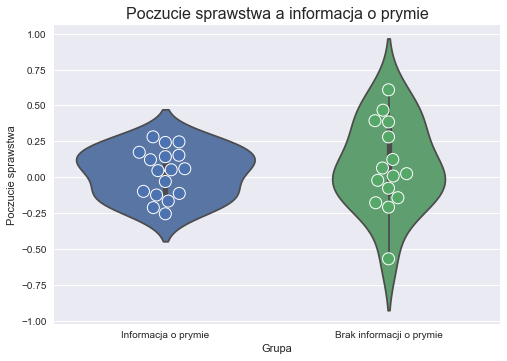

In [33]:
# Wykres wiolinowy dla SoA

sns.violinplot(y="Zdiff", x="Grupa", data=df)
sns.swarmplot(y="Zdiff", x="Grupa", data=df, edgecolor='white', linewidth=1, size=12)
plt.ylabel('Poczucie sprawstwa')
sns.plt.title('Poczucie sprawstwa a informacja o prymie', fontsize = 16)

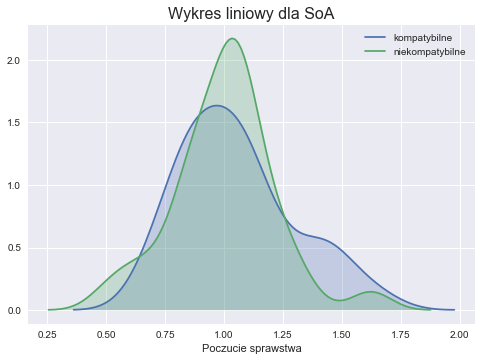

In [77]:
# Wykres liniowy dla SoA

sns.distplot(df.Zcomp, hist=False, kde_kws=dict(shade=True), label='kompatybilne')
sns.distplot(df.Zincomp, hist=False, kde_kws=dict(shade=True), label='niekompatybilne')
sns.plt.title('Wykres liniowy dla SoA', fontsize = 16)
plt.xlabel('Poczucie sprawstwa')

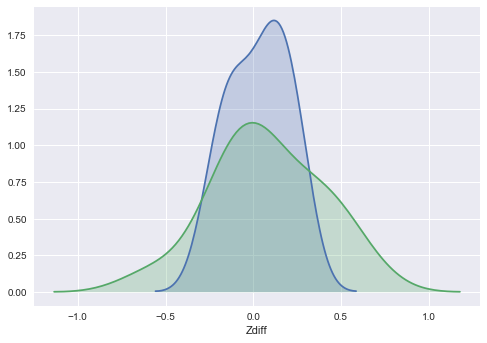

In [64]:
# Wykres liniowy dla SoA w podziale na grupy

sns.distplot(df.query('condition==1').Zdiff, hist=False, kde_kws=dict(shade=True))
sns.distplot(df.query('condition==-1').Zdiff, hist=False, kde_kws=dict(shade=True))

In [69]:
# Analiza wariancji dla SoA w podziale na grupy

info = df.query('condition==1').Zdiff
noinfo = df.query('condition==-1').Zdiff

scipy.stats.levene(info, noinfo, center='mean')

LeveneResult(statistic=3.8728449443641773, pvalue=0.058376873914058561)

## Analiza RT - regresja i wariancja

In [24]:
# Warunek kompatybilny

mod = ols(formula='Zcomp ~ condition * Zcomp_RT_LN', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Zcomp   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     2.864
Date:                Thu, 08 Jun 2017   Prob (F-statistic):             0.0545
Time:                        19:36:04   Log-Likelihood:                 4.6647
No. Observations:                  32   AIC:                            -1.329
Df Residuals:                      28   BIC:                             4.533
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.03

In [25]:
# Warunek niekompatybilny

mod = ols(formula='Zincomp ~ condition * Zincomp_RT_LN', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Zincomp   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.082
Method:                 Least Squares   F-statistic:                    0.2208
Date:                Thu, 08 Jun 2017   Prob (F-statistic):              0.881
Time:                        19:37:07   Log-Likelihood:                 4.4977
No. Observations:                  32   AIC:                           -0.9953
Df Residuals:                      28   BIC:                             4.868
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

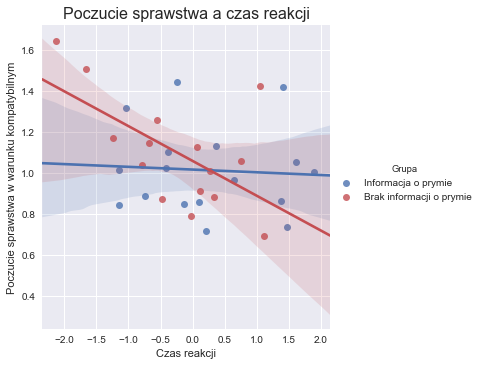

In [62]:
# Wykres "Poczucie sprawstwa a czas reakcji"
# Warunek kompatybilny

sns.set_color_codes()
pal = ['b', 'r']
plot1 = sns.lmplot(x="Zcomp_RT_LN", y="Zcomp", hue="Grupa", data=df,
           palette=pal);
plot1.set_titles(fontweight='bold')
plt.xlabel('Czas reakcji')
plt.ylabel('Poczucie sprawstwa w warunku kompatybilnym')
sns.plt.title('Poczucie sprawstwa a czas reakcji', fontsize = 16)

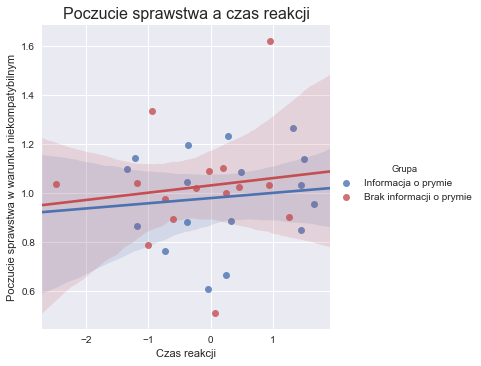

In [67]:
# Wykres "Poczucie sprawstwa a czas reakcji"
# Warunek niekompatybilny

sns.set_color_codes()
pal = ['b', 'r']
plot2 = sns.lmplot(x="Zincomp_RT_LN", y="Zincomp", hue="Grupa", data=df,
           palette=pal);
plot2.set_titles(fontweight='bold')
plt.xlabel('Czas reakcji')
plt.ylabel('Poczucie sprawstwa w warunku niekompatybilnym')
sns.plt.title('Poczucie sprawstwa a czas reakcji', fontsize = 16)

In [64]:
# Eksport obrazków do pliku

plot1.savefig("SoA_RT_interaction.png")
plot2.savefig("SoA_RT_interaction2.png")